In [2]:
import numpy as np
import pandas as pd

from structures import *
from averager import *
from usefull_graphics import *

import matplotlib.pyplot as plt

from tqdm import tqdm

# Ввод-вывод файла

В данном примере считывание производится из .csv-файла.

In [8]:
with open("myfile.csv") as file:
    data = StreamData(file.read(), 501, 981)

print(data.dataset)

             X     Y  Z  X Velocity  Y Velocity  Z Velocity  Unnamed: 6
0      -0.1250  0.00  0    0.000524    0.063100    0.000119         NaN
1      -0.1245  0.00  0    0.001133    0.159946    0.000207         NaN
2      -0.1240  0.00  0    0.002006    0.188397    0.000222         NaN
3      -0.1235  0.00  0    0.002408    0.191553    0.000225         NaN
4      -0.1230  0.00  0    0.002490    0.191796    0.000225         NaN
...        ...   ... ..         ...         ...         ...         ...
491476  0.1230  0.49  0   -0.004967   -0.238701    0.045147         NaN
491477  0.1235  0.49  0   -0.004193   -0.228045    0.043539         NaN
491478  0.1240  0.49  0   -0.002693   -0.196214    0.038637         NaN
491479  0.1245  0.49  0   -0.001164   -0.133619    0.022871         NaN
491480  0.1250  0.49  0   -0.000221   -0.043466    0.004108         NaN

[491481 rows x 7 columns]


# Осреднение

Создаем три временных списка, получая и преобразуя соотвествующие столбцы датасета

In [9]:
tmplistX = advance_to_column(data, "X Velocity")
tmplistY = advance_to_column(data, "Y Velocity")
tmplistZ = advance_to_column(data, "Z Velocity")

Функция возвращающая модуль трех введенных полей:

In [10]:
def calculate_module_of_arrays(our_fields: np.ndarray) -> np.ndarray:
    module_of_fields = [[float(0) for y in range(len(our_fields[0][0]))] for x in range(len(our_fields[0]))]
    for i in range(len(our_fields[0])):
        for j in range(len(our_fields[0][0])):
            module_of_fields[i][j] = (our_fields[0][i][j]**2 + our_fields[1][i][j]**2 + our_fields[2][i][j]**2)**0.5
    return module_of_fields

set parameters to graphics

In [14]:
# Set the size of the figure
figsize = (24, 8)

# Remove the axes from the subplots
show_axes = False

# Add a color bar to the subplots
show_colorbar = True

# Set the width ratio of each subplot
subplot_widths = [4, 4, 4, 4]

# Set the font size for all text elements
font_size = 10

# Set normalization
normalize = [-1.5, 1.5]

# Define radius of averaging
av_radius = 2

# Define max_processes
m_processes = 16

Делаем 100 итераций осреднения на `tmplistX` с радиусом 2

100%|██████████| 200/200 [04:49<00:00,  1.45s/it]


Vx field on different iterations
Vy field on different iterations
Vz field on different iterations
V modyle field on different iterations


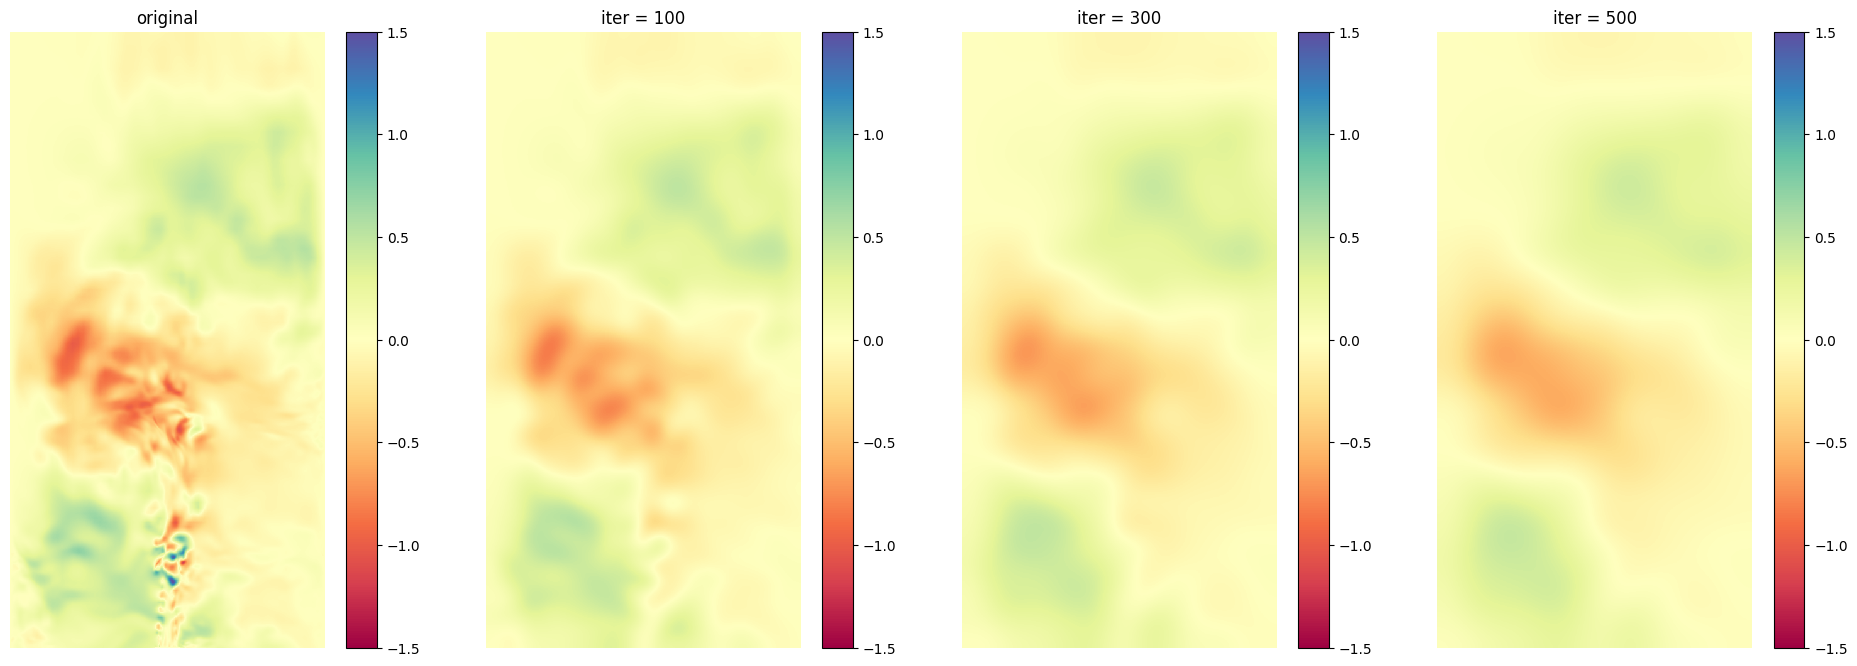

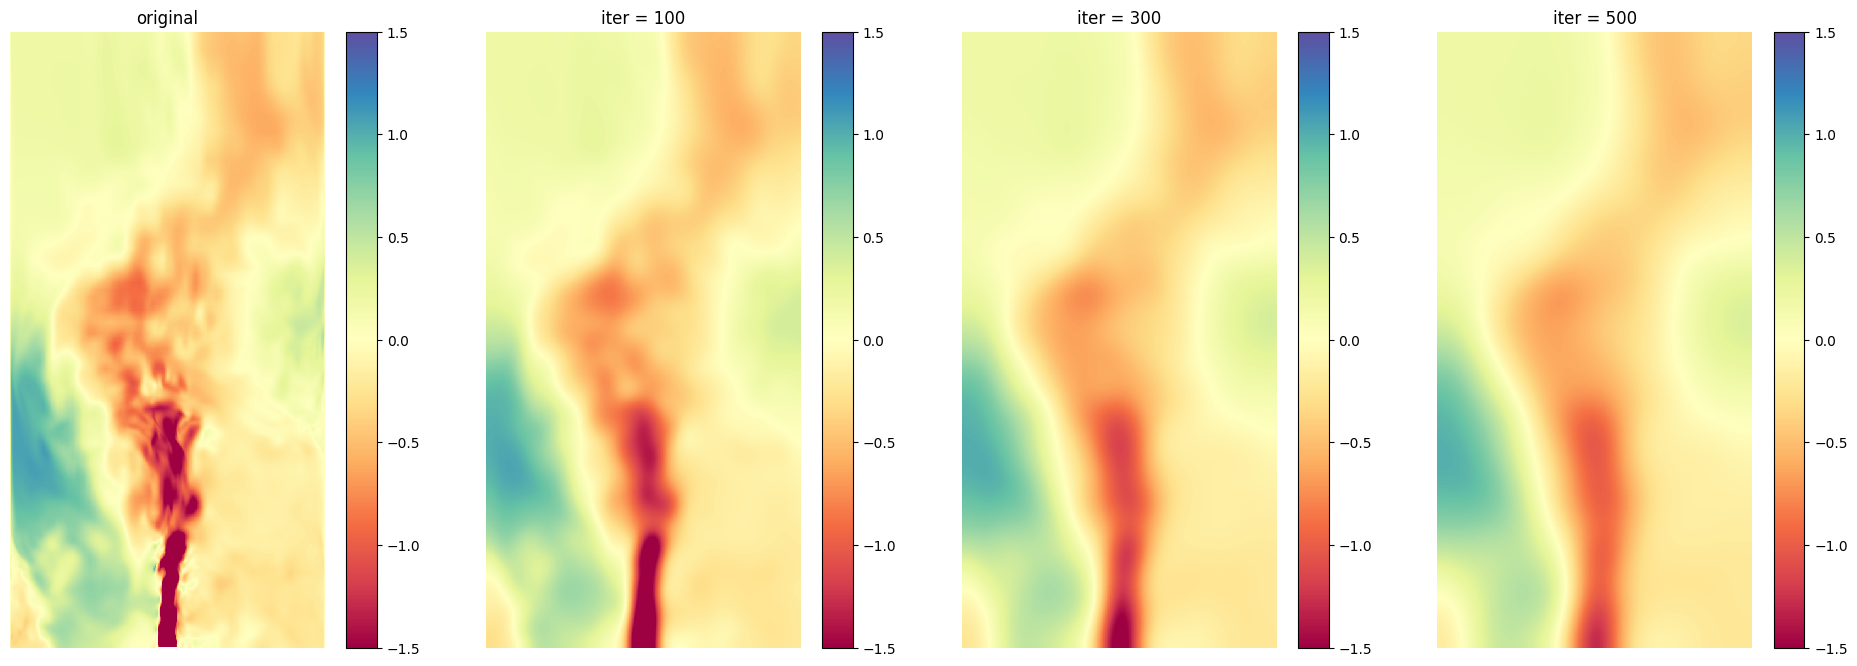

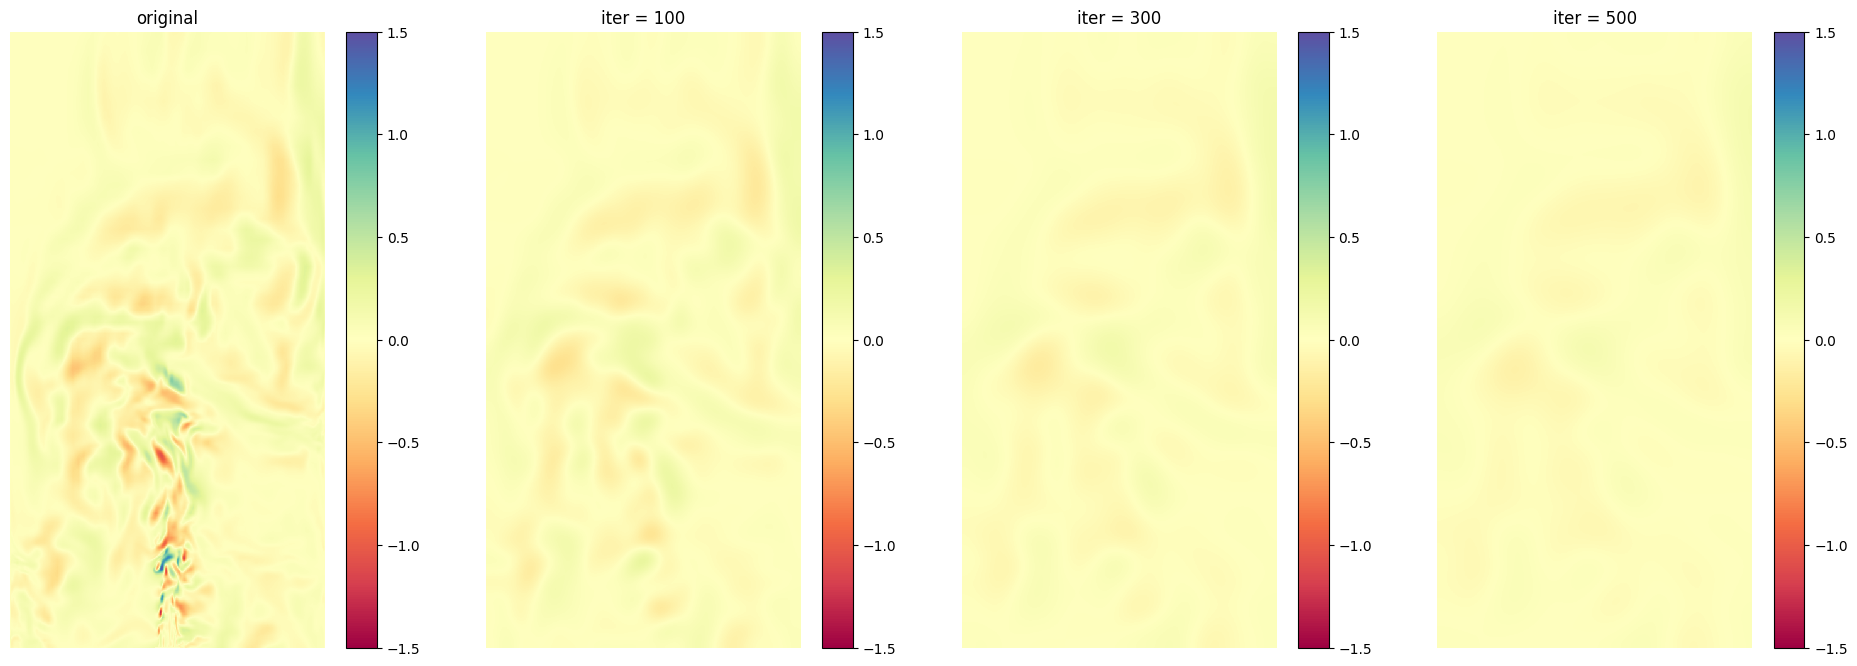

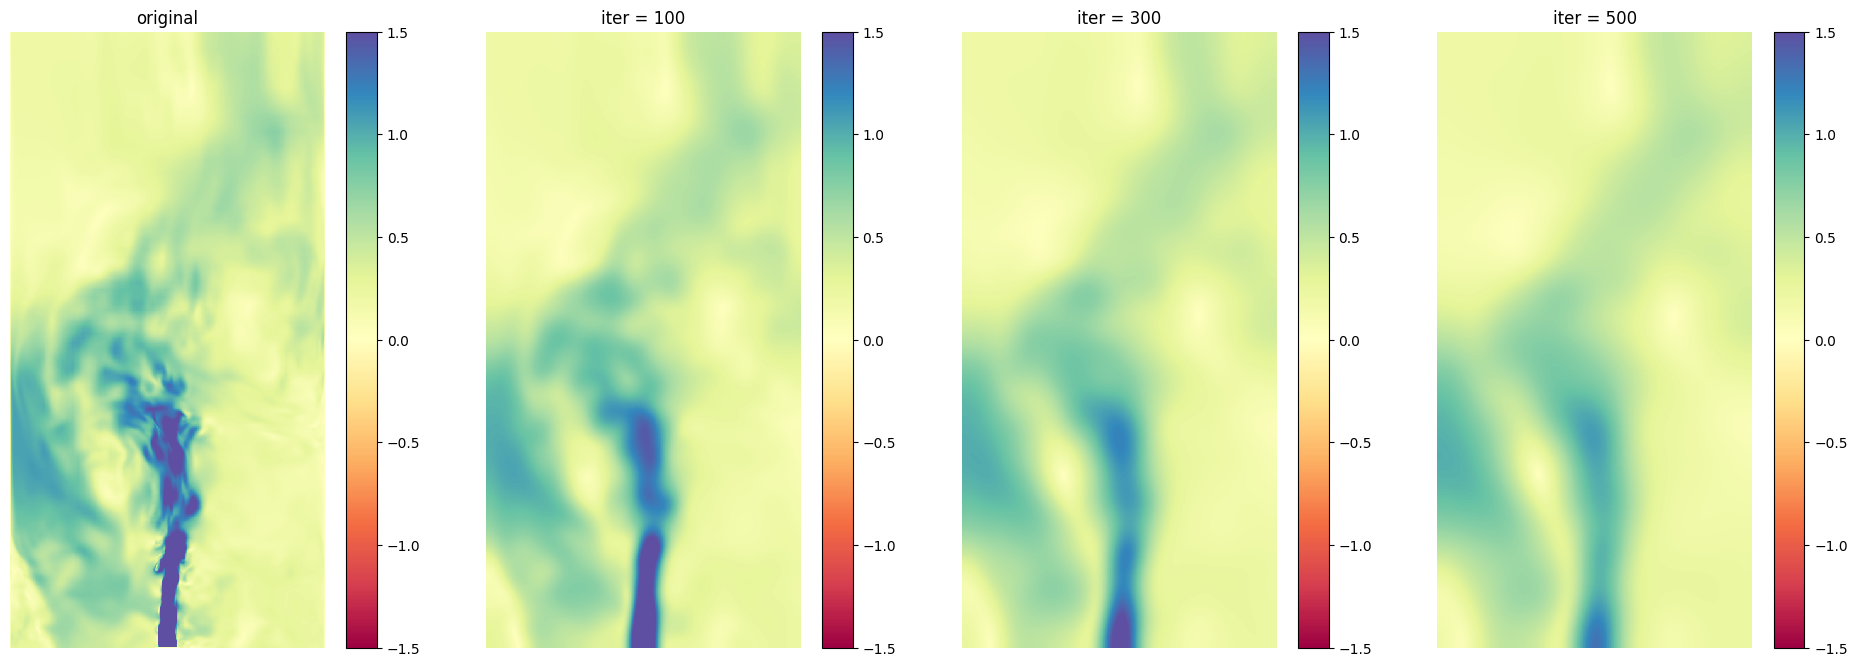

In [15]:

all_coord_mod = calculate_module_of_arrays((tmplistX, tmplistY, tmplistZ))

# tmplistX = np.array(tmplistX)
# tmplistY = np.array(tmplistY)
# tmplistZ = np.array(tmplistZ)

# av1 = tmplistX
# av2 = tmplistY
# av3 = tmplistZ

graphicsX = []
graphicsY = []
graphicsZ = []
graphicsM = []
graphicsX.append(tmplistX)
graphicsY.append(tmplistY)
graphicsZ.append(tmplistZ)
graphicsM.append(all_coord_mod)

titles = ["original", "iter = 100", "iter = 300", "iter = 500"]

av1 = basic_2d_array_averaging_parallel(np.asarray(tmplistX, dtype=np.float32), av_radius, max_processes=m_processes)
av2 = basic_2d_array_averaging_parallel(np.asarray(tmplistY, dtype=np.float32), av_radius, max_processes=m_processes)
av3 = basic_2d_array_averaging_parallel(np.asarray(tmplistZ, dtype=np.float32), av_radius, max_processes=m_processes)

with tqdm(total=100) as pbar:   
    for i in range(100):
        av1 = basic_2d_array_averaging_parallel(av1, av_radius, max_processes=m_processes)
        pbar.update(1)
with tqdm(total=100) as pbar:   
    for i in range(100):
        av2 = basic_2d_array_averaging_parallel(av2, av_radius, max_processes=m_processes)
        pbar.update(1)
with tqdm(total=100) as pbar:   
    for i in range(100):
        av3 = basic_2d_array_averaging_parallel(av3, av_radius, max_processes=m_processes)
        pbar.update(1)
all_coord_mod = calculate_module_of_arrays((av1, av2, av3))

graphicsX.append(av1)
graphicsY.append(av2)
graphicsZ.append(av3)
graphicsM.append(all_coord_mod)

with tqdm(total=200) as pbar:   
    for i in range(200):
        av1 = basic_2d_array_averaging_parallel(av1, av_radius, max_processes=m_processes)
        pbar.update(1)
with tqdm(total=200) as pbar:   
    for i in range(200):
        av2 = basic_2d_array_averaging_parallel(av2, av_radius, max_processes=m_processes)
        pbar.update(1)
with tqdm(total=200) as pbar:   
    for i in range(200):
        av3 = basic_2d_array_averaging_parallel(av3, av_radius, max_processes=m_processes)
        pbar.update(1)
all_coord_mod = calculate_module_of_arrays((av1, av2, av3))

graphicsX.append(av1)
graphicsY.append(av2)
graphicsZ.append(av3)
graphicsM.append(all_coord_mod)

with tqdm(total=200) as pbar:   
    for i in range(200):
        av1 = basic_2d_array_averaging_parallel(av1, av_radius, max_processes=m_processes)
        pbar.update(1)
with tqdm(total=200) as pbar:   
    for i in range(200):
        av2 = basic_2d_array_averaging_parallel(av2, av_radius, max_processes=m_processes)
        pbar.update(1)
with tqdm(total=200) as pbar:   
    for i in range(200):
        av3 = basic_2d_array_averaging_parallel(av3, av_radius, max_processes=m_processes)
        pbar.update(1)
all_coord_mod = calculate_module_of_arrays((av1, av2, av3))
graphicsX.append(av1)
graphicsY.append(av2)
graphicsZ.append(av3)
graphicsM.append(all_coord_mod)

fig1 = plot_figures_in_row(graphicsX, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)
fig1.savefig('Vx field on different iterations.jpg', dpi=300, format='jpeg')

fig2 = plot_figures_in_row(graphicsY, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)
fig2.savefig('Vy field on different iterations.jpg', dpi=300, format='jpeg')

fig3 = plot_figures_in_row(graphicsZ, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)
fig3.savefig('Vz field on different iterations.jpg', dpi=300, format='jpeg')

fig4 = plot_figures_in_row(graphicsM, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)
fig4.savefig('V modyle field on different iterations.jpg', dpi=300, format='jpeg')

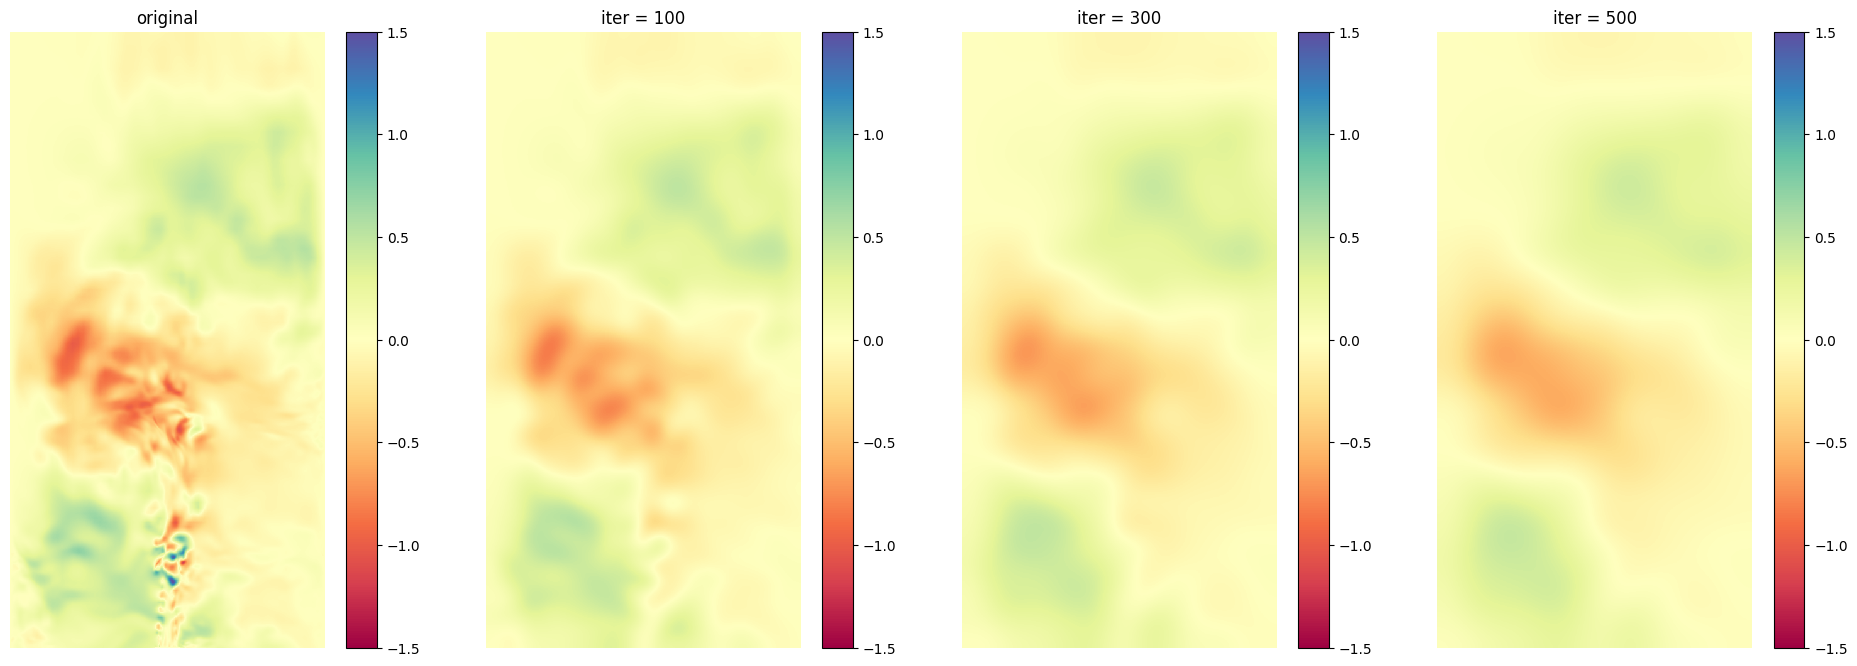

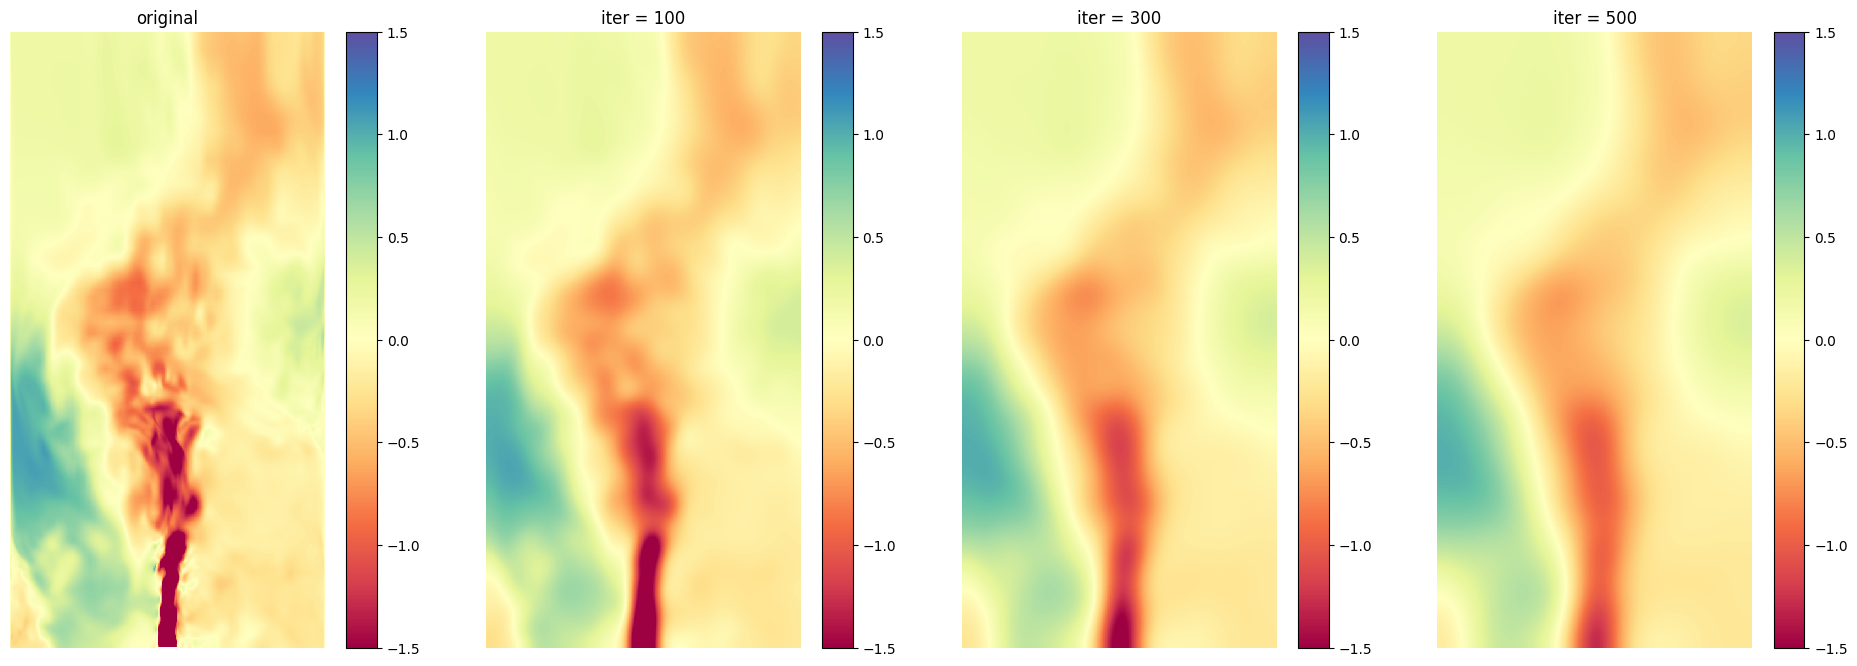

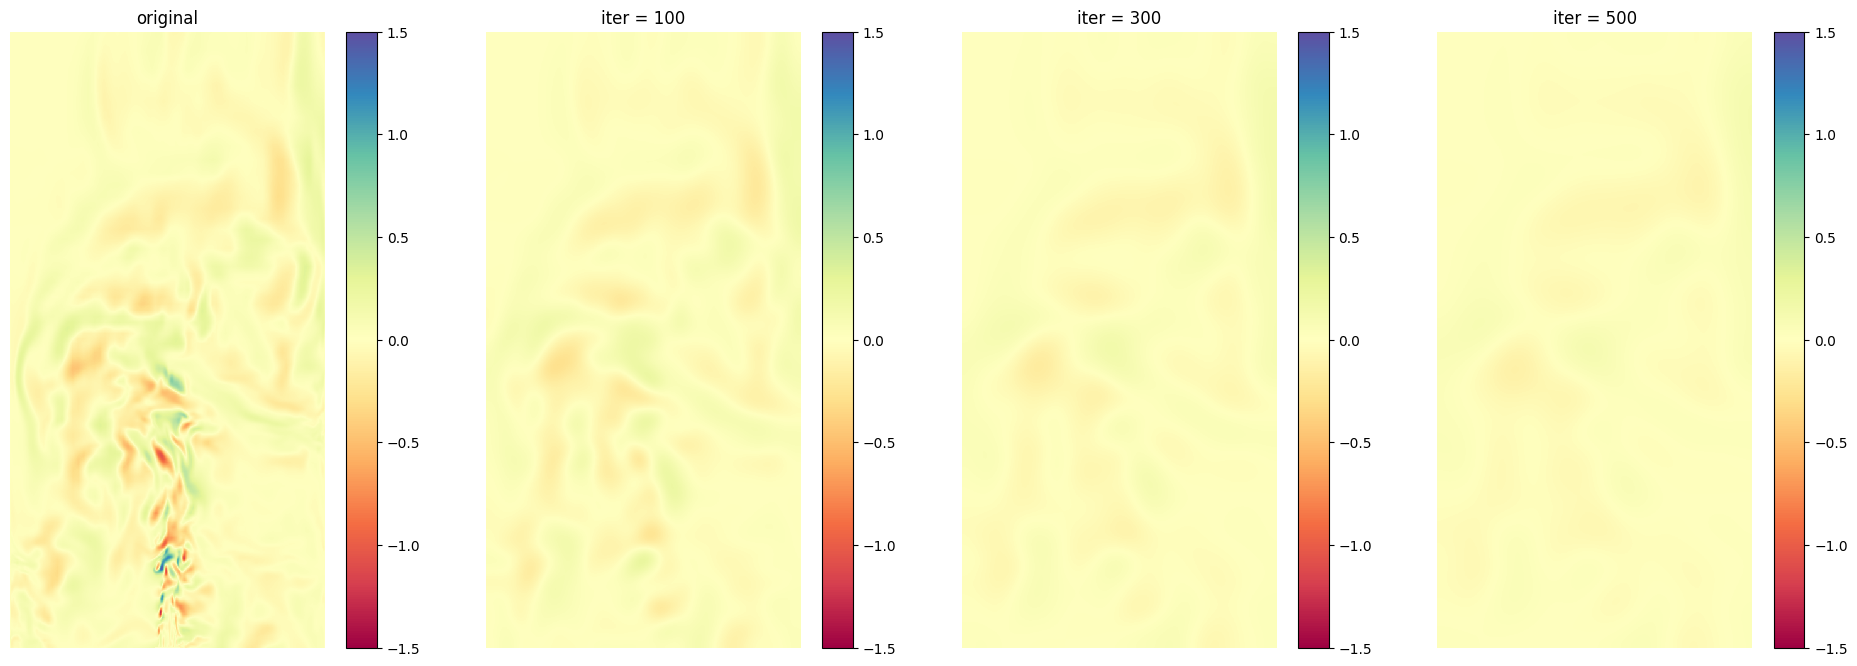

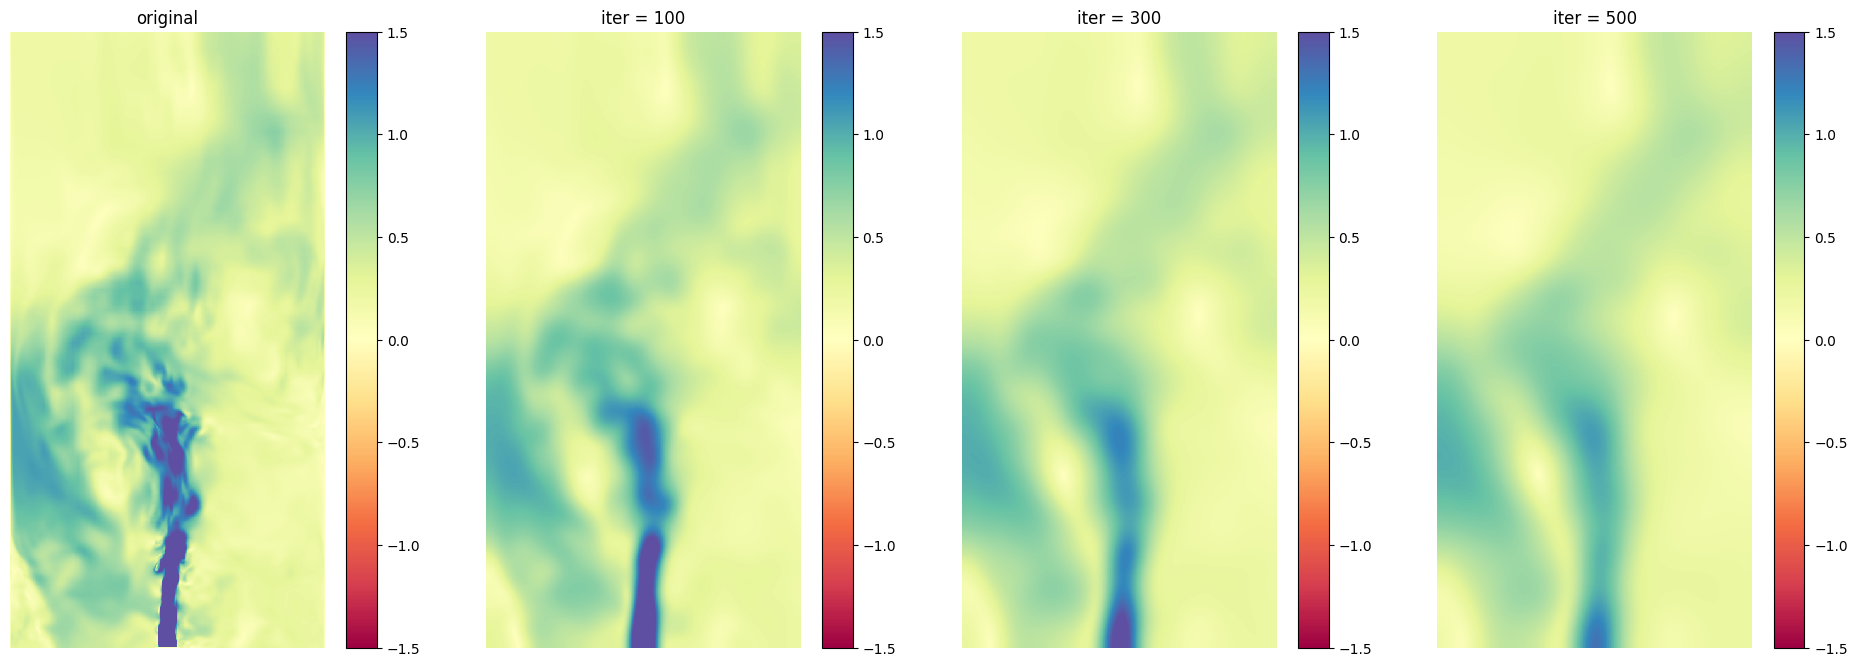

In [23]:
figsize = (24, 8)

fig1 = plot_figures_in_row(graphicsX, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)
fig1.savefig('Vx field on different iterations.png', dpi=300, format='png')

fig2 = plot_figures_in_row(graphicsY, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)
fig2.savefig('Vy field on different iterations.png', dpi=300, format='png')

fig3 = plot_figures_in_row(graphicsZ, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)
fig3.savefig('Vz field on different iterations.png', dpi=300, format='png')

fig4 = plot_figures_in_row(graphicsM, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)
fig4.savefig('V modyle field on different iterations.png', dpi=300, format='png')

Опять запускаем осреднение, только в этот раз сохраняем значения на каждой итерации.

In [16]:
av_radius = 2

all_coord_mod = calculate_module_of_arrays((tmplistX, tmplistY, tmplistZ))

figure1 = []
figure2 = []
figure3 = []
figure4 = []
figure1.append(tmplistX)
figure2.append(tmplistY)
figure3.append(tmplistZ)
figure4.append(all_coord_mod)


av1 = basic_2d_array_averaging_parallel(np.asarray(tmplistX, dtype=np.float32), av_radius, max_processes=m_processes, visuals=True)
av2 = basic_2d_array_averaging_parallel(np.asarray(tmplistY, dtype=np.float32), av_radius, max_processes=m_processes, visuals=True)
av3 = basic_2d_array_averaging_parallel(np.asarray(tmplistZ, dtype=np.float32), av_radius, max_processes=m_processes, visuals=True)
all_coord_mod = calculate_module_of_arrays((av1, av2, av3))

figure1.append(av1)
figure2.append(av2)
figure3.append(av3)
figure4.append(all_coord_mod)

with tqdm(total=100) as pbar:  
    for i in range(100):
        av1 = basic_2d_array_averaging_parallel(av1, av_radius, max_processes=m_processes)
        av2 = basic_2d_array_averaging_parallel(av2, av_radius, max_processes=m_processes)
        av3 = basic_2d_array_averaging_parallel(av3, av_radius, max_processes=m_processes)
        all_coord_mod = calculate_module_of_arrays((av1, av2, av3))
        figure1.append(av1)
        figure2.append(av2)
        figure3.append(av3)
        figure4.append(all_coord_mod)
        pbar.update(1)


100%|██████████| 100/100 [10:02<00:00,  6.02s/it]


In [ ]:
# Set normalization
normalize = [-1.5, 1.5]

# Set duration
frame_dur = 80

create_gif(figure1, 'figure1.gif', name='Vx averaging', duration=frame_dur, vmin = normalize[0], vmax = normalize[1])
create_gif(figure2, 'figure2.gif', name='Vy averaging', duration=frame_dur, vmin = normalize[0], vmax = normalize[1])
create_gif(figure3, 'figure3.gif', name='Vz averaging', duration=frame_dur, vmin = normalize[0], vmax = normalize[1])
create_gif(figure4, 'figure4.gif', name="module V's averaging", duration=frame_dur, vmin = normalize[0], vmax = normalize[1])

Получилось как-то так

In [17]:
import time

test_field = np.random.random((500,500))
vmax = np.max(test_field)
vmin = np.min(test_field)
figure1 = []
times = []
radiuses = []
processing = []
figure1.append(test_field)
with tqdm(total=8*10) as pbar:
    for m_processes in range(2,17, 2):
        for av_radius in range(1,11):
            start_time = time.process_time()
            test_field = basic_2d_array_averaging_parallel(test_field, av_radius, max_processes=m_processes)
            end_time = time.process_time()
            processing.append(m_processes)
            radiuses.append(av_radius)
            times.append(end_time-start_time)
            figure1.append(test_field)
            pbar.update(1)

100%|██████████| 80/80 [01:23<00:00,  1.04s/it]


MovieWriter imagemagick unavailable; using Pillow instead.


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.5625, 0.59375, 0.5625, 0.5, 0.71875, 0.578125, 0.40625, 0.703125, 0.421875, 0.65625, 0.578125, 0.53125, 0.578125, 0.484375, 0.65625, 0.546875, 0.421875, 0.6875, 0.53125, 0.4375, 0.671875, 0.640625, 0.453125, 0.671875, 0.578125, 0.421875, 0.6875, 0.453125, 0.640625, 0.5625, 0.453125, 0.71875, 0.515625, 0.765625, 0.6875, 0.625, 0.484375, 0.71875, 0.625, 0.5, 0.765625, 0.65625, 0.515625, 0.75, 0.6875, 0.515625, 0.75, 0.53125, 0.703125, 0.671875, 0.609375, 0.859375, 

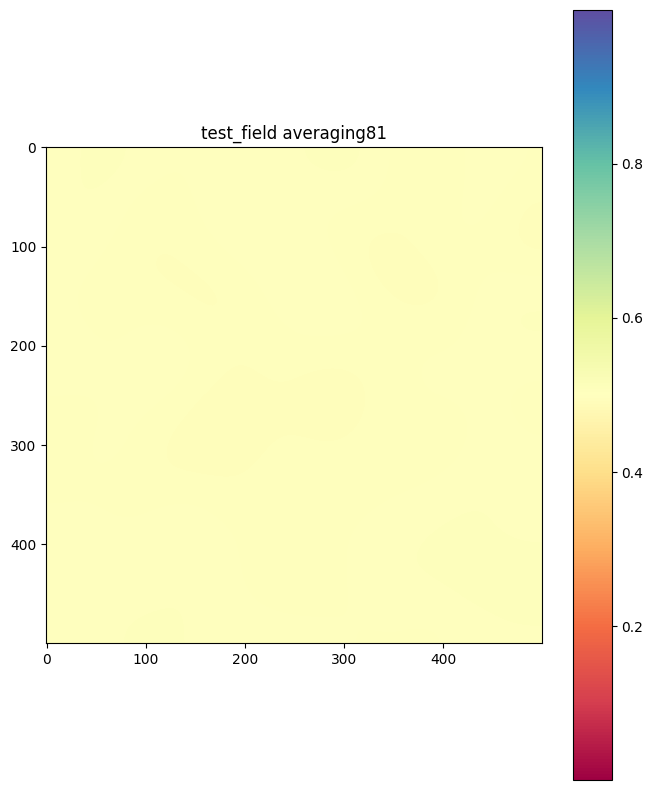

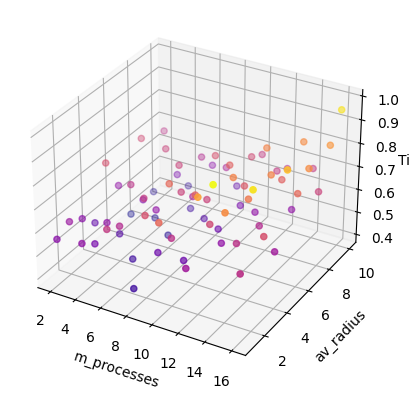

In [18]:
from mpl_toolkits.mplot3d import Axes3D

x = processing # m_processes
y = radiuses # av_radius
z = times # time

print(x)
print(y)
print(z)
# Plot the scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='plasma')
ax.set_xlabel('m_processes')
ax.set_ylabel('av_radius')
ax.set_zlabel('Time')
plt.show()